In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

%matplotlib inline

In [2]:
sel_mun = ["Albertslund","Ballerup","Brøndby","Dragør","Frederiksberg","Gentofte","Gladsaxe",
           "Glostrup","Herlev","Hvidovre","Høje-Taastrup","Ishøj","København",
           "Rødovre","Tårnby","Vallensbæk"] 

In [3]:
os.getcwd()

'/Users/tuethomsen28/Google Drev/SocialDataVizz/Fase1_Plots_kode'

In [4]:
path = '/Users/tuethomsen28/Google Drev/SocialDataVizz/Data'

df = pd.read_csv(os.path.join(path,"Corona_hosp_1603_2204.csv"),sep=",").dropna()
df = df.rename(columns={"Unnamed: 0":"Dato","Taarnby":"Tårnby"})
df.Dato = pd.to_datetime(df.Dato,format="%Y-%m-%d")
df = df.set_index("Dato")

# Load premade .csv file over total population per municipality

In [5]:
def ageInt(x):
    return (int(x.split()[0]))

In [6]:
path = '/Users/tuethomsen28/Google Drev/SocialDataVizz/Data'

popu = pd.read_excel(os.path.join(path,"Data_aldersfordeling.xlsx"))

popu['Age'] = popu['Age'].apply(ageInt)

popu = popu.groupby("Municipality").sum()

popu = popu.loc[sel_mun][["Number"]]

popu.columns = ["Population"]


# Normalising data by dividing by population per municipality

In [7]:
from bokeh.io import show, output_notebook, output_file
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, FactorRange, Legend, HoverTool, DatetimeTickFormatter
from bokeh.transform import dodge
from matplotlib.pyplot import viridis
from bokeh.embed import file_html
from bokeh.resources import CDN
import math

import bokeh.palettes
output_notebook()

Loading BokehJS ...

In [8]:
df_norm = df.div(popu["Population"].T,axis=1)*100000
df_norm.loc["mean_hosp"] = df_norm[sel_mun].mean(0)
meanhosp = pd.DataFrame(df_norm.loc["mean_hosp"].T).round()

In [9]:
df_norm

,Albertslund,Ballerup,Brøndby,Dragør,Frederiksberg,Gentofte,Gladsaxe,Glostrup,Herlev,Hvidovre,Høje-Taastrup,Ishøj,København,Rødovre,Tårnby,Vallensbæk
Dato,,,,,,,,,,,,,,,,
2020-03-16 00:00:00,0.000000,2.057528,2.849815,0.000000,1.917454,0.000000,2.887586,4.323763,0.000000,1.868216,1.970094,4.349906,1.265142,0.000000,2.326176,0.000000
2020-03-17 00:00:00,0.000000,2.057528,5.699630,0.000000,2.876180,1.336362,2.887586,4.323763,3.453874,1.868216,1.970094,4.349906,1.739570,0.000000,2.326176,0.000000
2020-03-18 00:00:00,3.606073,4.115057,8.549444,0.000000,4.793634,1.336362,5.775173,8.647527,3.453874,3.736432,3.940188,4.349906,3.162855,2.459904,2.326176,6.012145
2020-03-19 00:00:00,3.606073,4.115057,11.399259,0.000000,5.752361,1.336362,7.218966,8.647527,3.453874,3.736432,3.940188,4.349906,3.637284,2.459904,4.652353,6.012145
2020-03-20 00:00:00,3.606073,6.172585,11.399259,0.000000,6.711088,1.336362,7.218966,12.971290,3.453874,5.604648,3.940188,8.699813,4.427998,2.459904,4.652353,6.012145
2020-03-21 00:00:00,3.606073,6.172585,14.249074,6.899407,6.711088,2.672725,7.218966,12.971290,6.907747,5.604648,5.910282,8.699813,5.060569,2.459904,4.652353,6.012145
2020-03-22 00:00:00,7.212145,6.172585,14.249074,6.899407,8.628541,2.672725,8.662759,17.295054,6.907747,5.604648,5.910282,8.699813,5.851283,2.459904,4.652353,12.024289
2020-03-23 00:00:00,7.212145,8.230114,14.249074,6.899407,8.628541,2.672725,10.106552,17.295054,6.907747,7.472864,5.910282,8.699813,6.483854,4.919807,6.978529,12.024289
2020-03-24 00:00:00,7.212145,8.230114,17.098889,6.899407,9.587268,2.672725,10.106552,21.618817,6.907747,7.472864,7.880376,13.049719,7.274567,4.919807,6.978529,12.024289


In [10]:
meanhosp.to_csv(os.path.join(path,"mean_hosp_per_mun.csv"))

In [11]:
#Creating format fitting for bokeh
source = ColumnDataSource(meanhosp)

#Creating a list for the x-axis on the bar-chart. 
x_range = [str(h) for h in source.data['index']]

#Generating 14 colors for the different focus crimes  
color = bokeh.palettes.Category20[20][2]

bar ={} # to store vbars

#Creating figure frame with title, x -and y labels and disabling toolbar. 
p = figure(x_range=FactorRange(factors=x_range),
           title='Mean Covid-19 hospitalisations per 100.000 distributed on municipalites (16/03 - 22/04)',
           x_axis_label='Municipality',
           y_axis_label='Mean Covid-19 hospitalisations per 100.000"',
           plot_width=950,plot_height=500)

#List of on - and offboarding passengers in february and march for 2019 and 2020
#boardings = ["På_202002","På_202003"]


#Generating barcharts to p 

r = p.vbar("index",  top="mean_hosp", source= source, width=0.8, 
             fill_alpha=0.5,line_color=None,
             color=color,visible=True)

p.xaxis.major_label_orientation = math.pi/4

mun = r.name #extracting the name of each rendered crime
hover = HoverTool(tooltips=[
    ('Hospitalisations per million: ' , '@mean_hosp') #@ - extracts the fractions from each focuscrime
], renderers=[r]) # assigns the hoved effect to the correct bar rendering

p.add_tools(hover)
    
p.y_range.start = 0 #setting the y range from zero

show(p)

#Make correct formatting 

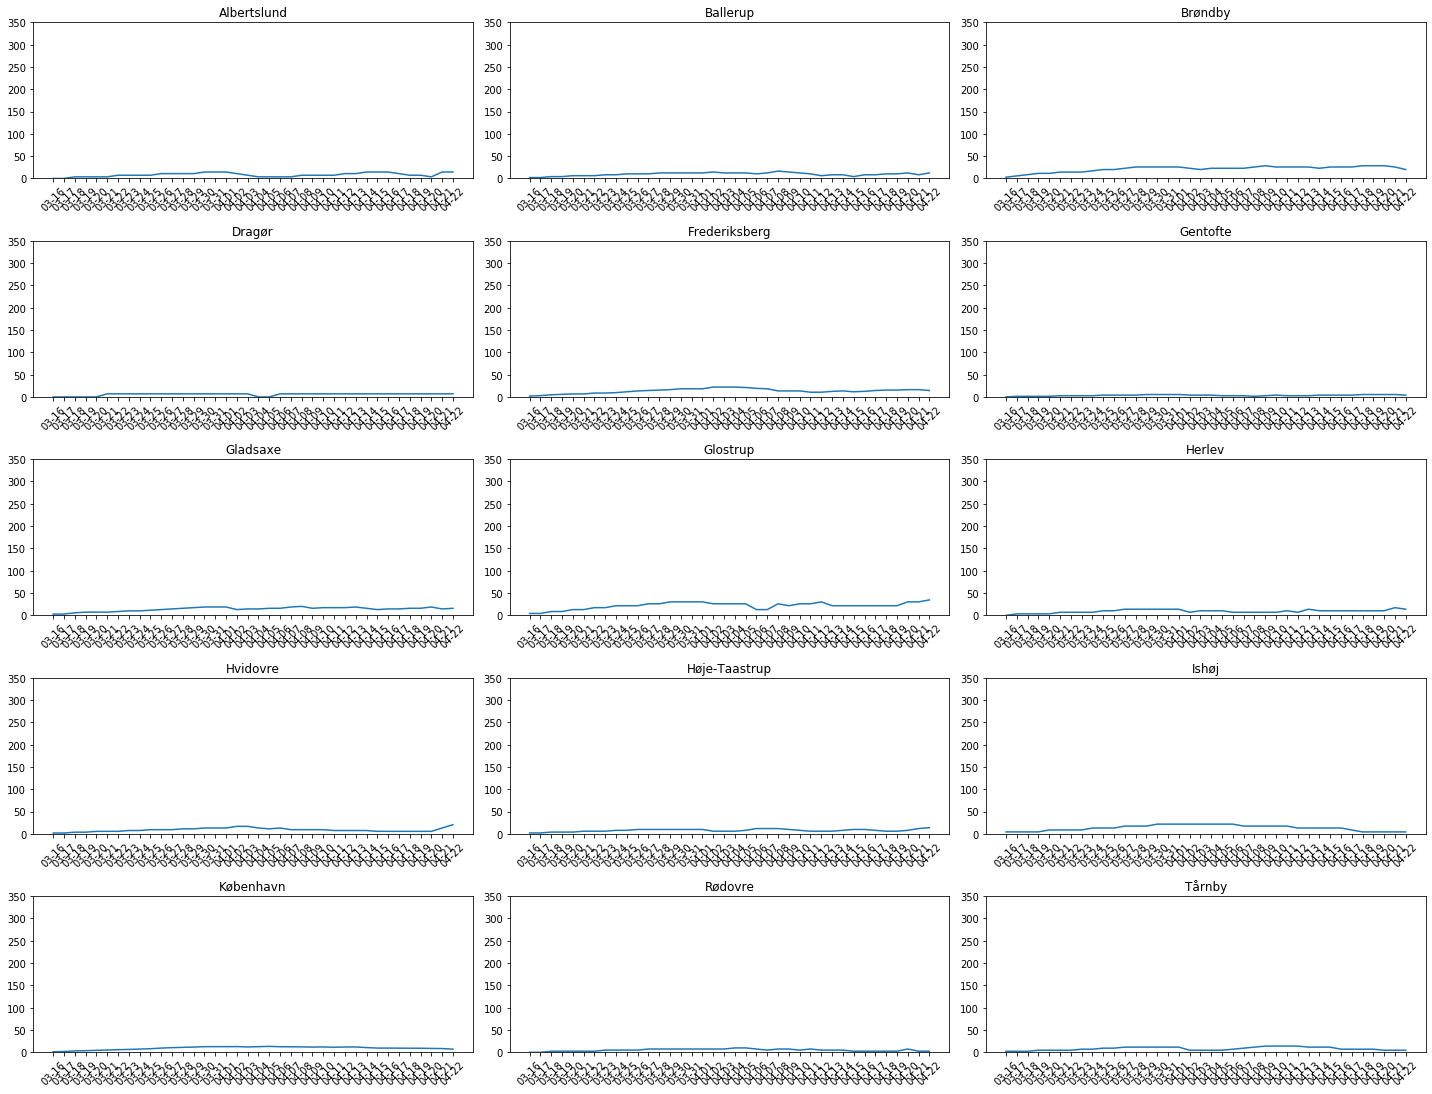

In [12]:
fig = plt.figure(figsize=(20,30))

time = [str(t)[5:10] for t in df.index]

for k,num in zip(df_norm.columns, range(1,len(df_norm.columns))):
    ax = fig.add_subplot(10,3,num)
    ax.plot(time, df_norm[k][:-1])
    ax.set_title(k,)
    ax.set_xticklabels(time,rotation=45)
    ax.set_ylim(0,350)

plt.tight_layout()
plt.show()

In [13]:
from bokeh.io import show, output_notebook, output_file
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, FactorRange, Legend, HoverTool, DatetimeTickFormatter
from bokeh.transform import dodge
from matplotlib.pyplot import viridis
from bokeh.embed import file_html
from bokeh.resources import CDN

import bokeh.palettes
output_notebook()

Loading BokehJS ...

In [14]:
df_norm["Total"] = df_norm.sum(1)

df_norm

,Albertslund,Ballerup,Brøndby,Dragør,Frederiksberg,Gentofte,Gladsaxe,Glostrup,Herlev,Hvidovre,Høje-Taastrup,Ishøj,København,Rødovre,Tårnby,Vallensbæk,Total
Dato,,,,,,,,,,,,,,,,,
2020-03-16 00:00:00,0.000000,2.057528,2.849815,0.000000,1.917454,0.000000,2.887586,4.323763,0.000000,1.868216,1.970094,4.349906,1.265142,0.000000,2.326176,0.000000,25.815682
2020-03-17 00:00:00,0.000000,2.057528,5.699630,0.000000,2.876180,1.336362,2.887586,4.323763,3.453874,1.868216,1.970094,4.349906,1.739570,0.000000,2.326176,0.000000,34.888888
2020-03-18 00:00:00,3.606073,4.115057,8.549444,0.000000,4.793634,1.336362,5.775173,8.647527,3.453874,3.736432,3.940188,4.349906,3.162855,2.459904,2.326176,6.012145,66.264750
2020-03-19 00:00:00,3.606073,4.115057,11.399259,0.000000,5.752361,1.336362,7.218966,8.647527,3.453874,3.736432,3.940188,4.349906,3.637284,2.459904,4.652353,6.012145,74.317689
2020-03-20 00:00:00,3.606073,6.172585,11.399259,0.000000,6.711088,1.336362,7.218966,12.971290,3.453874,5.604648,3.940188,8.699813,4.427998,2.459904,4.652353,6.012145,88.666544
2020-03-21 00:00:00,3.606073,6.172585,14.249074,6.899407,6.711088,2.672725,7.218966,12.971290,6.907747,5.604648,5.910282,8.699813,5.060569,2.459904,4.652353,6.012145,105.808667
2020-03-22 00:00:00,7.212145,6.172585,14.249074,6.899407,8.628541,2.672725,8.662759,17.295054,6.907747,5.604648,5.910282,8.699813,5.851283,2.459904,4.652353,12.024289,123.902608
2020-03-23 00:00:00,7.212145,8.230114,14.249074,6.899407,8.628541,2.672725,10.106552,17.295054,6.907747,7.472864,5.910282,8.699813,6.483854,4.919807,6.978529,12.024289,134.690797
2020-03-24 00:00:00,7.212145,8.230114,17.098889,6.899407,9.587268,2.672725,10.106552,21.618817,6.907747,7.472864,7.880376,13.049719,7.274567,4.919807,6.978529,12.024289,149.933816


In [15]:
source = ColumnDataSource(df_norm.round())

In [16]:
p = figure(plot_width=900, plot_height=450, x_axis_type="datetime",toolbar_location=None)
p.title.text = 'Click on legend entries to hide the corresponding lines'

colors = bokeh.palettes.Category20[len(df_norm.columns)]

legend_it = []

#Applying total to plot which will be visible
renderers = p.line("Dato",
                       "Total",
                       line_width=2,
                       color=colors[-1],
                       alpha=0.8,
                       muted_color = colors[-1],
                       muted_alpha=0.2,
                       visible=True,
                       source=source)

legend_it.append(("Total", [renderers]))

legend = Legend(items=legend_it, location=(0, 360))

p.add_layout(legend, 'right')
p.yaxis.axis_label = 'Covid-19 hospitalisations per 1 100.000'

hover = HoverTool(tooltips=[
    ("Name", "Total"),
    ('Amount: ', '@Total'),
    ("Date: ", '@Dato{%d-%m}')],
    formatters = {'@Dato':'datetime'},
    renderers=[renderers],
    mode="vline")

p.add_tools(hover)


show(p)

In [17]:
p = figure(plot_width=1000, plot_height=450, x_axis_type="datetime",toolbar_location=None)
p.title.text = 'Click on legend entries to hide the corresponding lines'

colors = bokeh.palettes.Category20[len(df_norm.columns)]

renderers = [0]*len(df_norm.columns)
legend_it = []

for name, color, idx in zip(sel_mun,colors,range(len(df_norm.columns)-1)):
    renderers[idx]= p.line("Dato",
                           name,
                           line_width=2,
                           color=color,
                           alpha=0.8,
                           muted_color=color,
                           muted_alpha=0.2,
                           visible=False,
                           source=source)
    legend_it.append((name, [renderers[idx]]))
    


    
legend = Legend(items=legend_it, location=(0, -5))
legend.click_policy="hide"
legend.title = 'To see a graph click on the municipality below'

p.add_layout(legend, 'right')
p.yaxis.axis_label = 'Covid-19 hospitalisations per 1 100.000'

for kommune,r in zip(df_norm.columns[:-1],renderers):
    hover = HoverTool(tooltips=[
        ("Name", kommune),
        ('Amount: ', '@{%s}' %kommune),
        ("Date: ", '@Dato{%d-%m}')],
        formatters = {'@Dato':'datetime'},
        renderers=[r],
        mode="vline")
    p.add_tools(hover)
    



#output_file("interactive_legend.html", title="interactive_legend.py example")
show(p)

In [18]:
renderers[-1]

0